In [5]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [28]:
from matplotlib import pyplot as plt

In [29]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [30]:
import numpy as np
x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

In [31]:
epsilon =1e-10

x_mean = np.mean(x_train_reshaped)
x_std= np.std(x_train_reshaped)

In [32]:
x_train_norm = (x_train_reshaped - x_mean)/(x_std +epsilon)
x_test_norm =(x_test_reshaped - x_mean)/(x_std + epsilon)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [42]:
model.compile(
    optimizer = 'sgd',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(x_train_norm,y_train_encoded,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 2s 847us/step - loss: 0.2738 - accuracy: 0.9002
Epoch 2/7
1875/1875 [==============================] - 2s 848us/step - loss: 0.2652 - accuracy: 0.9032
Epoch 3/7
1875/1875 [==============================] - 2s 845us/step - loss: 0.2576 - accuracy: 0.9070
Epoch 4/7
1875/1875 [==============================] - 2s 863us/step - loss: 0.2502 - accuracy: 0.9081
Epoch 5/7
1875/1875 [==============================] - 2s 851us/step - loss: 0.2433 - accuracy: 0.9111
Epoch 6/7
1875/1875 [==============================] - 2s 866us/step - loss: 0.2351 - accuracy: 0.9144
Epoch 7/7
1875/1875 [==============================] - 2s 847us/step - loss: 0.2293 - accuracy: 0.9167


In [48]:
loss,accuracy = model.evaluate(x_test_norm,y_test_encoded)
print(accuracy*100,"%")

313/313 [==============================] - 0s 700us/step - loss: 0.3335 - accuracy: 0.8782
87.81999945640564 %


In [49]:
preds = model.predict(x_test_norm)
print("Shape of preds:",preds.shape)

313/313 [==============================] - 0s 605us/step
Shape of preds: (10000, 10)


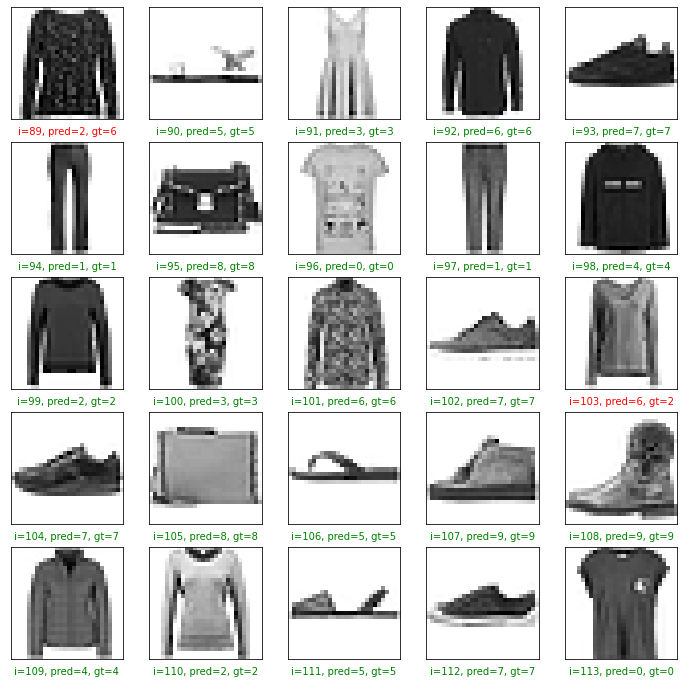

In [56]:
plt.figure(figsize=(12,12))

start_index = 89
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred= np.argmax(preds[start_index+i])
    gt =y_test[start_index+i]
    
    col = 'g'
    if pred !=gt:
        col ='r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

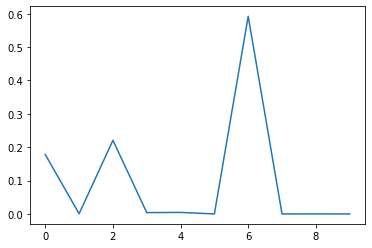

In [57]:
plt.plot(preds[103])
plt.show